# PCA and Dimensionality Reduction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#########Test1#################
import numpy as np

A = np.array([[0,8],[2,6]])

#Calculating Eigen Values and Eigen Vectors

[V,D] = np.linalg.eig(A)
print('Eigenvalues:')
print(V)
print('Eigenvectors:')
print(D)



Eigenvalues:
[-2.  8.]
Eigenvectors:
[[-0.9701425  -0.70710678]
 [ 0.24253563 -0.70710678]]


**Applying sklearn's PCA to the matrix.**

In [ ]:
import sklearn.decomposition as skd

pca = skd.PCA(n_components = 3)
skd.PCA.fit(pca,X)
W1 = pca.components_
W = W1.transpose()
print('Eigenvectors of sample covariance matrix S, produced by numpy PCA:')
print(W)

print('Eigenvectors of sample covariance matrix S, computed directly')
[V,D] = np.linalg.eig(S)
print('Eigenvectors:')
print(D)

Z = pca.transform(X)

print('Showing Z, the transformed version of data matrix X produced by PCA without any dimension reduction')
print(Z)


Eigenvectors of sample covariance matrix S, produced by numpy PCA:
[[ 0.44487192  0.83125078 -0.33333333]
 [-0.51222011  0.54146663  0.66666667]
 [-0.73465607  0.12584124 -0.66666667]]
Eigenvectors of sample covariance matrix S, computed directly
Eigenvectors:
[[-0.44487192  0.83125078  0.33333333]
 [ 0.51222011  0.54146663 -0.66666667]
 [ 0.73465607  0.12584124  0.66666667]]
Showing Z, the transformed version of data matrix X produced by PCA without any dimension reduction
[[-3.27885811e-01  3.38349619e+00 -7.15477060e-16]
 [ 4.28209516e+00 -1.48970353e+00  6.16790569e-16]
 [-3.95420935e+00 -1.89379266e+00 -4.93432455e-17]]


In [ ]:
# Repeating the above but reducing dimension to 2
pca = skd.PCA(n_components = 2)
skd.PCA.fit(pca,X)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(X)
print('Showing Z, the transformed version of data matrix X produced by PCA, reducing dimension to 2')
print(Z)


Showing Z, the transformed version of data matrix X produced by PCA, reducing dimension to 2
[[-0.32788581  3.38349619]
 [ 4.28209516 -1.48970353]
 [-3.95420935 -1.89379266]]


## Recovering an approximate version of the original dataset, after PCA


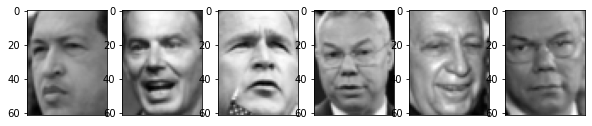

[ 91.94698  95.09418 101.15502 ... 117.36201 110.7413  104.42233]


In [ ]:
# Each image is a 62x47 pixel array.
from PIL import Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, h, w = lfw_people.images.shape
npix = h*w
fea = lfw_people.data

def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

plt.figure(figsize=(10,20))
nplt = 6
for i in range(nplt):    
    plt.subplot(1,nplt,i+1)
    plt_face(fea[i])

plt.show()
mu = np.mean(fea,0)
print(mu)


In [ ]:


plt.figure(figsize=(10,20))
nplt = 6
plt.subplot(1,nplt,1)
plt_face(fea[1])

# Compute the mean of all the examples in the dataset fea. 

msample = np.mean(fea,0)
plt.subplot(1,6,2)
plt_face(msample)

# Dimensionality reduction with pca.  Using numpy and/or sklearn,
# computing the 5 top principal components of the data matrix fea.

pca_5 = skd.PCA(n_components = 5)
skd.PCA.fit(pca_5,fea)
W1_5 = pca_5.components_
print(fea.shape)
fea_z = W1_5.dot(fea[1]-msample)
print(fea_z)
#print(fea_z.shape)

# Using the reconstruction equation X=W^T*Z+M
# Display the resulting approximate image.

# W = W.transpose()
print(W.shape)
print(fea_z)
fea_new = W.dot(fea_z)+msample
plt.figure(figsize=(10,20))
plt.subplot(1,6,1)
plt_face(fea_new)
print(fea_new)

# #25 features

pca_25 = skd.PCA(n_components = 25)
skd.PCA.fit(pca_25,fea)
W1_25 = pca_25.components_
W_25 = W1_25.transpose()

fea_z_25 = fea.dot(W_25)

W_25 = W_25.transpose()
fea_new_25 = W_25.dot(fea_z_25)+msample

plt.subplot(1,6,2)
plt_face(fea_new_25)
plt.show()





## Dimensionality reduction in sentiment analysis

In [ ]:
# begin by creating the data matrix and target vector, as in the previous homework
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# read in train and test files, removing newlines

f = open("/content/drive/MyDrive/MLAssign2/trainfilex.txt", "r")
trainrevs = [line.rstrip('\n') for line in f]

f = open("/content/drive/MyDrive/MLAssign2/trainfiley.txt","r")
trainlabels = [line.rstrip('\n') for line in f]

f = open("/content/drive/MyDrive/MLAssign2/testfilex.txt","r")
testrevs = [line.rstrip('\n') for line in f]

f = open("/content/drive/MyDrive/MLAssign2/testfiley.txt","r")
testlabels = [line.rstrip('\n') for line in f]

vectorizer = CountVectorizer()
# Create the vocabulary for our feature transformation
vectorizer.fit(trainrevs)
print(trainrevs)
print(len(trainrevs))
# Next we create the feature vectors for the training data
X_train = vectorizer.transform(trainrevs).toarray() # code to turn the training reviews into a feature vector
X_test = vectorizer.transform(testrevs).toarray() # code to turn the test reviews into a feature vector

print(X_train.shape)
print(X_train)


[' serious and thoughtful  ', ' with a completely predictable plot  you  ll swear that you  ve seen it all before  even if you  ve never come within a mile of the longest yard  ', ' if there was any doubt that peter o fallon did n t have an original bone in his body  a rumor of angels should dispel it  ', ' i like my christmas movies with more elves and snow and less pimps and ho  s  ', ' a terrifically entertaining specimen of spielbergian sci-fi  ', ' transcends its agenda to deliver awe-inspiring  at times sublime  visuals and offer a fascinating glimpse into the subculture of extreme athletes whose derring-do puts the x into the games  ', ' after you laugh once maybe twice  you will have completely forgotten the movie by the time you get back to your car in the parking lot  ', ' true to its animatronic roots :  as stiff  ponderous and charmless as a mechanical apparatus   the country bears  should never have been brought out of hibernation  ', ' nothing short of wonderful with its 

In [ ]:
# features in the data matrix X_train?

print(X_train.shape[1])

5308


# Selection Features using Gini Impurity

For k features, we will choose the k features with **lowest** weighted Gini impurity.


In [ ]:
#  We begin by binarizing the training data matrix
# Create a lambda function that returns 1 for positive inputs, 0 otherwise
positive_check = lambda i: 1 if i > 0 else 0

# Create a vectorized version of lambda function
vectorized_positive_check = np.vectorize(positive_check)

# apply vectorized function to all elements of X_train to "binarize" the matrix 
X_train_binarized = vectorized_positive_check(X_train)
print(X_train_binarized.shape)
print(X_train.shape)


(1349, 5308)
(1349, 5308)


## Compute the weighted Gini impurity


In [ ]:
def wtdGini(X,y,i):
########## TO DO ##########
    y = np.array(y)
    #sl and sr
    sl = []
    sr = []
    for k in range(0,X_train_binarized.shape[0]):
      if X_train_binarized[k][i] == 0:
        sl.append(k)
      else:
        sr.append(k)
    
    print(len(sl)," ",len(sr)," ",X.shape[0])
    
    #p's in gl
    pl_0 = 0
    pl_1 = 0
    for k in range(len(sl)):
      if y[sl[k]] == '0':
        pl_0 = pl_0+1
      else:
        pl_1 = pl_1+1
    
    pl_0 = pl_0/len(sl)
    pl_1 = pl_1/len(sl)
    gl = pl_0*(1-pl_0) + pl_1*(1-pl_1)
    print("gl",gl)
    
    #p's of gr
    pr_0 = 0
    pr_1 = 0
    for k in range(len(sr)):
      if y[sr[k]] == '0':
        pr_0 = pr_0+1
      else:
        pr_1 = pr_1+1
    
    pr_0 = pr_0/len(sr)
    pr_1 = pr_1/len(sr)
    gr = pr_0*(1-pr_0) + pr_1*(1-pr_1)

    print("gr",gr)

    res = (len(sl)/X.shape[0])*gl + (len(sr)/X.shape[0])*gr

##########
    return res

wtdGini(X_train_binarized,trainlabels,51)

1344   5   1349
gl 0.4966506785005669
gr 0.48


0.4965889636061986

In [ ]:
########### TO DO #############
vect = []
vocab = []
for i in range(X_train_binarized.shape[1]):
  res = wtdGini(X_train_binarized,trainlabels,i)
  vect.append(res)
  vocab.append(i)
print(vect)
###############################

[0.4965889636061986, 0.49630234947086865, 0.49630234947086865, 0.49673078521140523, 0.49642223165637583, 0.49642223165637583, 0.49642223165637583, 0.49654450254090954, 0.49642223165637583, 0.49630234947086865, 0.49642223165637583, 0.49642223165637583, 0.49642223165637583, 0.49642223165637583, 0.49630234947086865, 0.49642223165637583, 0.49642223165637583, 0.49630234947086865, 0.49654450254090954, 0.49642223165637583, 0.4967259239254742, 0.49642223165637583, 0.49630234947086865, 0.49630234947086865, 0.49630234947086865, 0.49630234947086865, 0.49642223165637583, 0.49630234947086865, 0.495868423529101, 0.49642223165637583, 0.49630234947086865, 0.49630234947086865, 0.49630234947086865, 0.49642223165637583, 0.49673078521140523, 0.49673078521140523, 0.49630234947086865, 0.49642223165637583, 0.49630234947086865, 0.49548758896076095, 0.49630234947086865, 0.49630234947086865, 0.49642223165637583, 0.49630234947086865, 0.49642223165637583, 0.495868423529101, 0.49642223165637583, 0.4963023494708686

In [ ]:
############## TO DO #####################

Z = [x for _,x in sorted(zip(vect,vocab))]
idx_IN_columns = []
for i in range(1000):
  v=vectorizer.vocabulary_
  listOfKeys = [key  for (key, value) in v.items() if value == Z[i]]
  print(listOfKeys)
  idx_IN_columns.append(Z[i])
  
idx_IN_columns = np.array(idx_IN_columns)
print(idx_IN_columns)
###########################################

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none').fit(X_train, trainlabels)
print("Training accuracy:")
print(clf.score(X_train,trainlabels))
print("Test accuracy:")
print(clf.score(X_test, testlabels))
print(X_train.shape)

Training accuracy:
1.0
Test accuracy:
0.7947019867549668
(1349, 5308)


Selecting k features with lowest weighted Gini impurity, for k=10,50, 100, 250, 500, 750, 1000.

In [ ]:
extractedData = X_train[:,idx_IN_columns]

clf2 = LogisticRegression(penalty='none',max_iter=500).fit(extractedData, trainlabels)
print("Training accuracy:")

print(clf2.score(extractedData,trainlabels))
print("Test accuracy:")
print(clf2.score(X_test[:,idx_IN_columns], testlabels))


Training accuracy:
0.9873980726464048
Test accuracy:
0.7814569536423841


## Comparing to dimensionality reduction with PCA

Using sklearn's PCA to do dimensionality reduction, rather than feature selection based on Gini impurity. For k=10,50, 100, 500, 1000.

In [ ]:
pca = skd.PCA(n_components = 1000)
skd.PCA.fit(pca,X_train)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(X_train)
print("Z",Z.shape)
print("X",X_train.shape)

clf3 = LogisticRegression(penalty='none',max_iter=500).fit(Z, trainlabels)
print("Training accuracy:")
print(clf3.score(Z,trainlabels))
print("Test accuracy:")
print(clf3.score(pca.transform(X_test), testlabels))


Z (1349, 1000)
X (1349, 5308)
Training accuracy:
1.0
Test accuracy:
0.7814569536423841
